<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

2024-02-21 08:23:38.682208: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-21 08:23:38.902715: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-21 08:23:38.904836: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-21 08:23:40.289423: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Load and Prepare Data

In [2]:
data = pd.read_csv("Churn.csv")

## EDA

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.shape

(10000, 14)

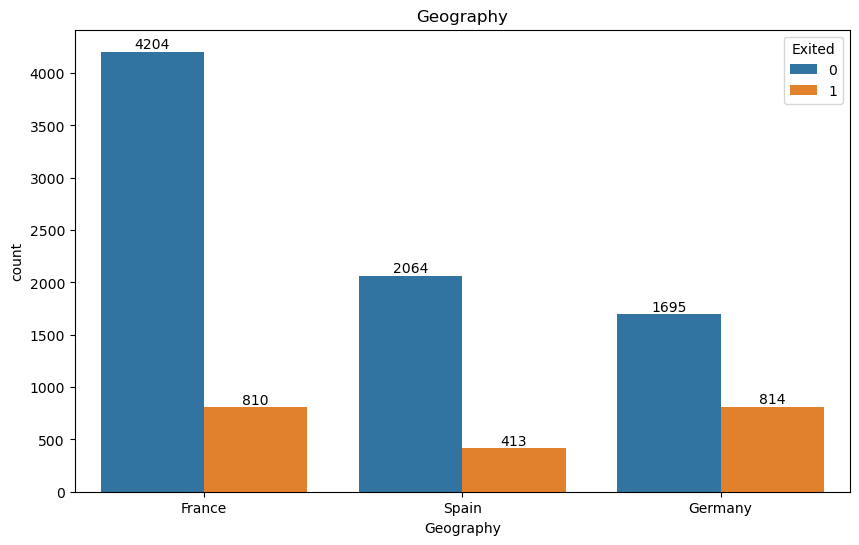

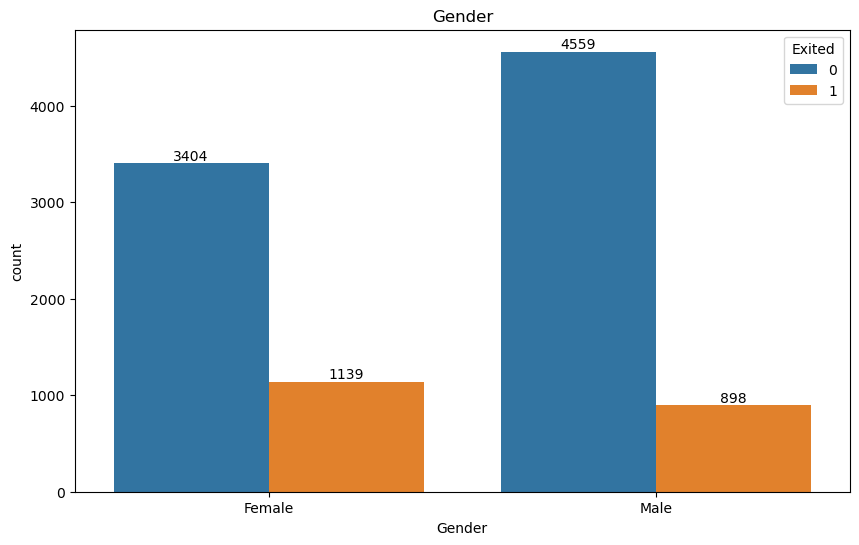

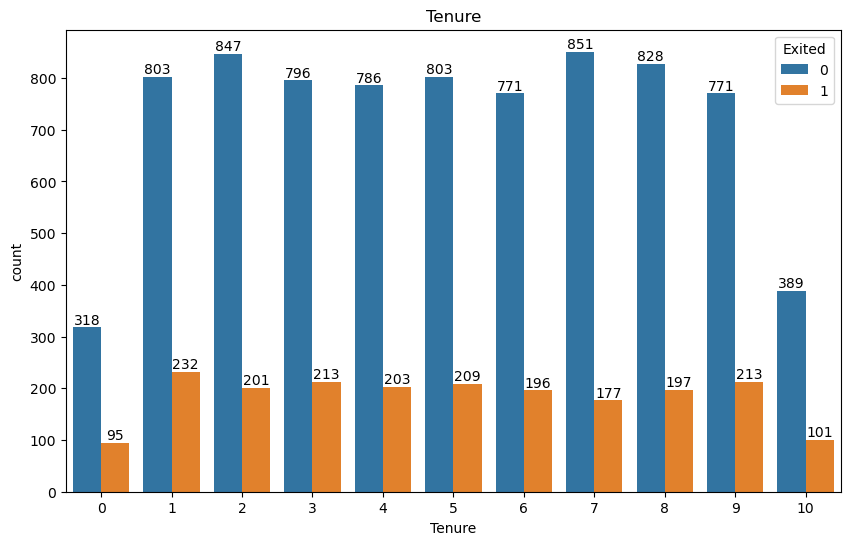

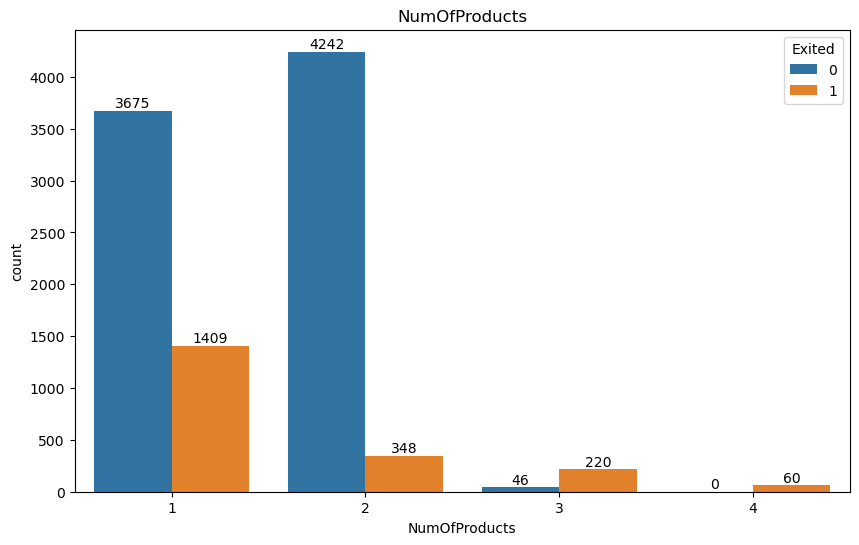

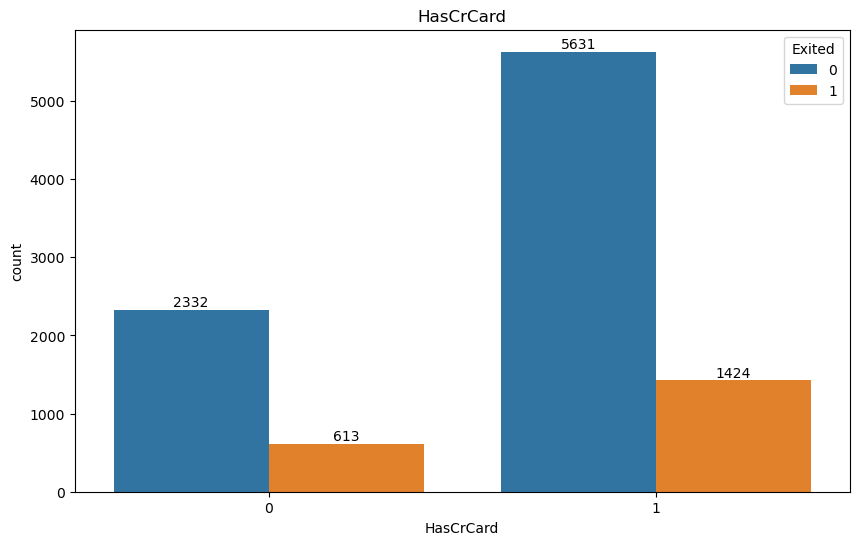

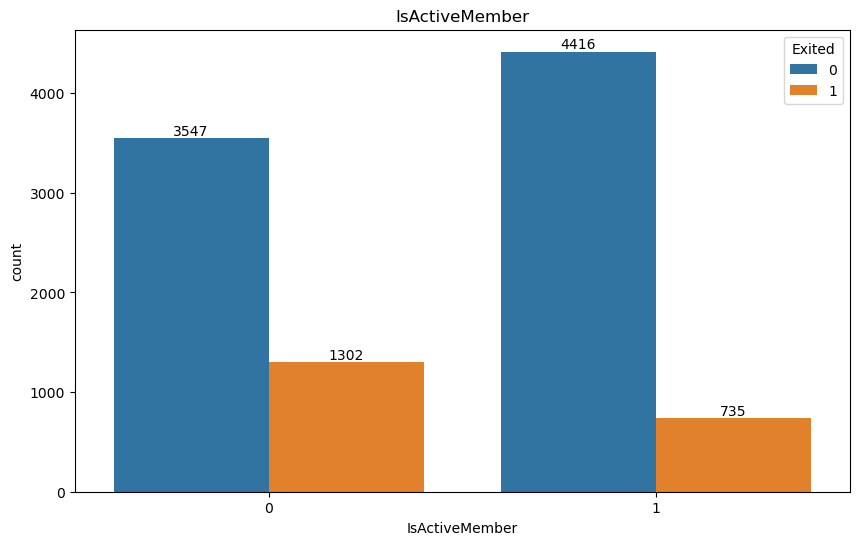

In [8]:
cat_data = data[["Geography", "Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember"]]
for i in cat_data:
    plt.figure(figsize=(10, 6))
    plt.title(i)
    ax = sns.countplot(data=data, x=data[i], hue="Exited")
    for container in ax.containers:
        ax.bar_label(container)

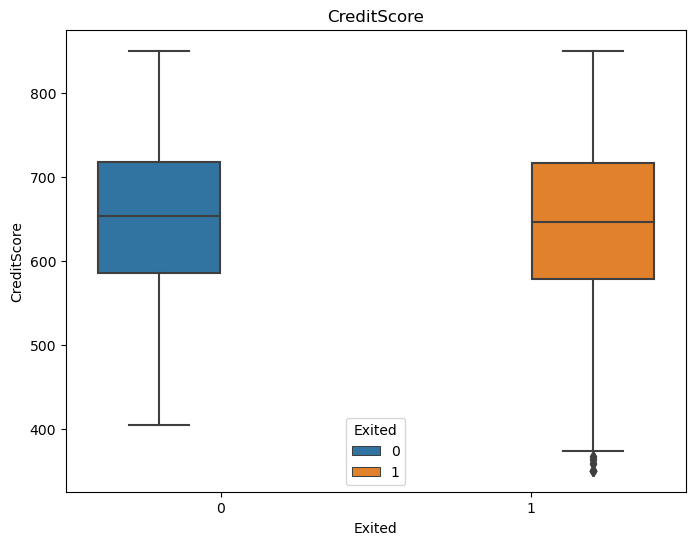

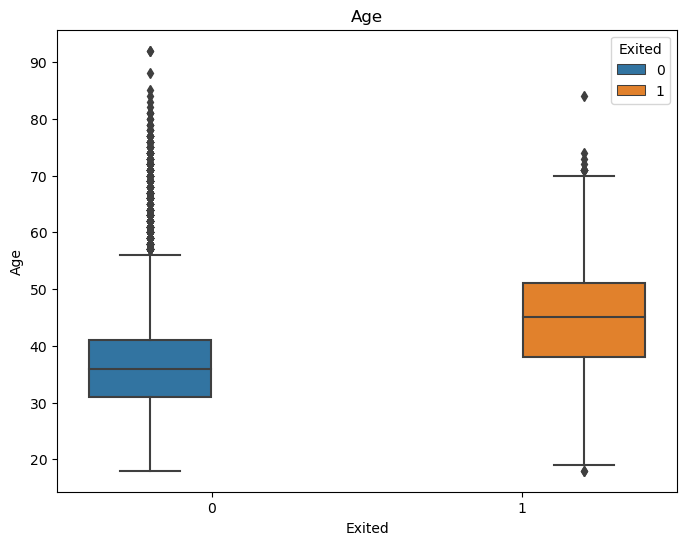

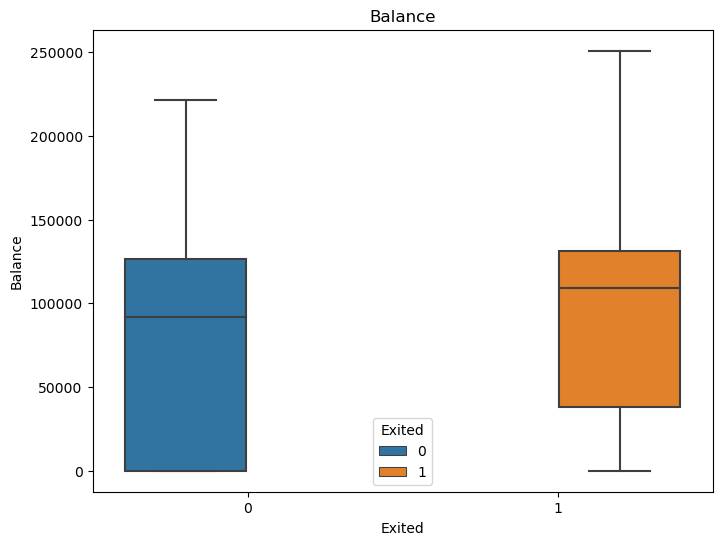

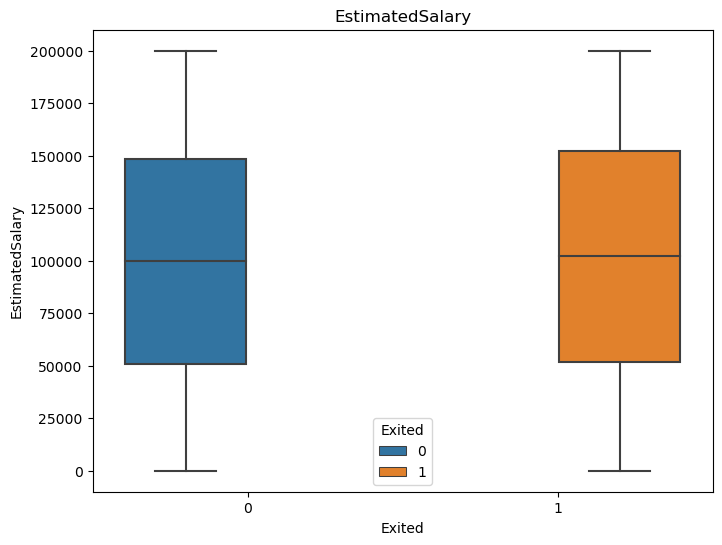

In [9]:
num_data = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
for i in num_data:
    plt.figure(figsize=(8, 6))
    plt.title(i)
    sns.boxplot(data=data, x=data["Exited"], y=data[i], hue="Exited")

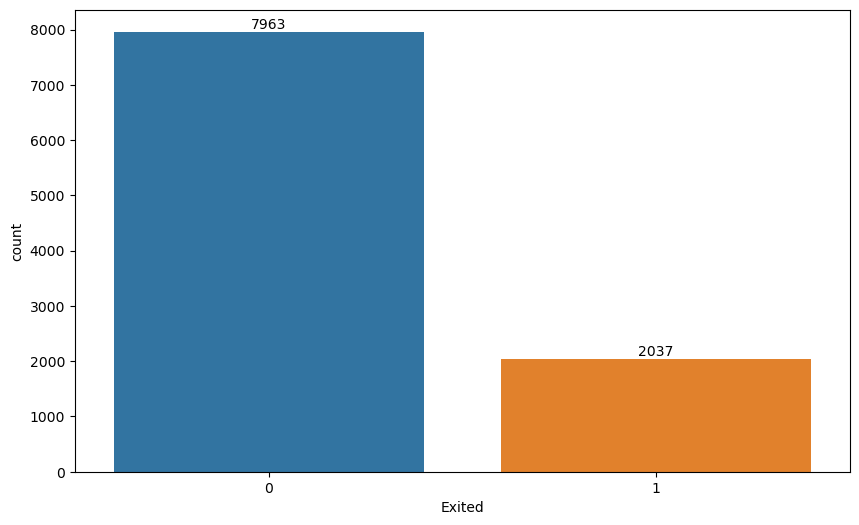

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x=data["Exited"])
ax.bar_label(container=ax.containers[0])
plt.show()

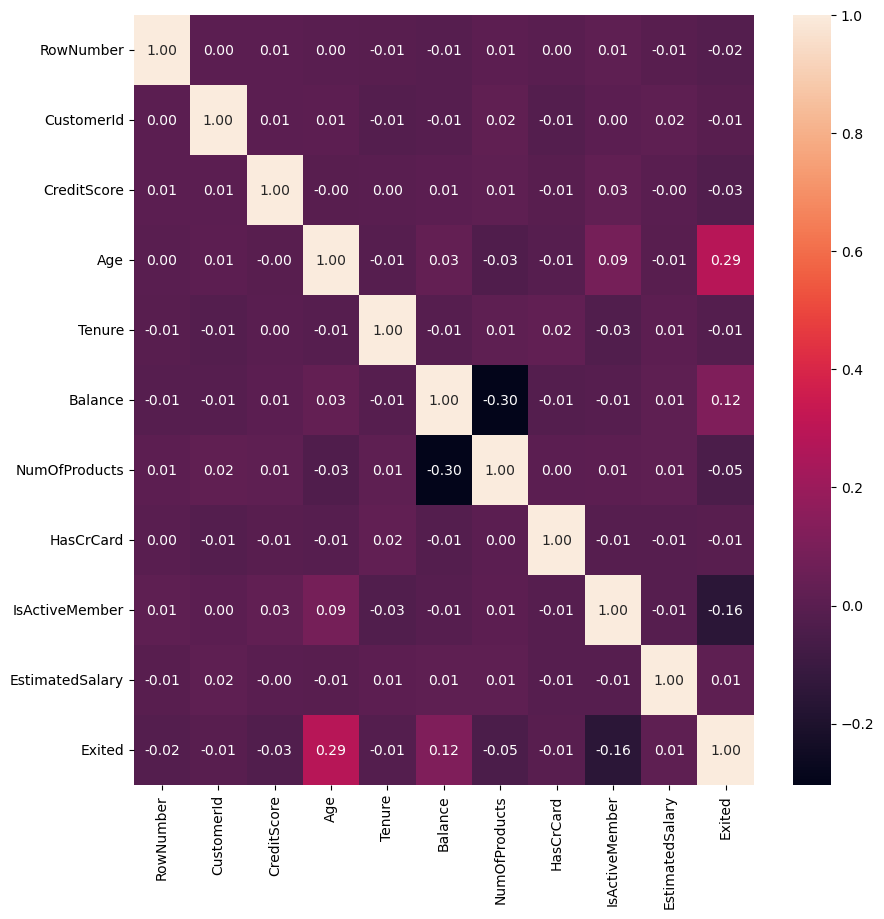

In [11]:
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(data=corr, annot=True, fmt="0.2f")
plt.show()

## Data Preprocessing

In [12]:
df = data.copy()

In [13]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [14]:
df = pd.get_dummies(data=df, columns=["Geography", "Gender"])

## Strorytelling - Visualization

## Prepare Data for Machine learning

In [15]:
X = df.drop("Exited", axis=1)
y = df[["Exited"]]

In [16]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [17]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [18]:
# Spliting train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [19]:
X_train.shape

(7500, 13)

In [20]:
y_train.shape

(7500, 1)

In [21]:
# Standardization of input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train your model

In [22]:
# Train XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_test_xgb = xgb_model.predict(X_test)
y_pred_train_xgb = xgb_model.predict(X_train)

In [23]:
accuracy_xgb_testdata = accuracy_score(y_test, y_pred_test_xgb) * 100
accuracy_xgb_traindata = accuracy_score(y_train, y_pred_train_xgb) * 100
print(f"Accuracy of the XGBoost Model on Testdata: {accuracy_xgb_testdata:.2f}")
print(f"Accuracy of the XGBoost Model on Traindata: {accuracy_xgb_traindata:.2f}")
print(classification_report(y_test, y_pred_test_xgb))

Accuracy of the XGBoost Model on Testdata: 85.96
Accuracy of the XGBoost Model on Traindata: 96.17
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2003
           1       0.71      0.49      0.58       497

    accuracy                           0.86      2500
   macro avg       0.80      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500



In [24]:
#Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_test_svm = svm_model.predict(X_test)
y_pred_train_svm = svm_model.predict(X_train)

In [25]:
accuracy_svm_testdata = accuracy_score(y_test, y_pred_test_svm) * 100
accuracy_svm_traindata = accuracy_score(y_train, y_pred_train_svm) * 100
print(f"Accuracy of the Support Vector Machine Model on test data: {accuracy_svm_testdata:.2f}")
print(f"Accuracy of the Support Vector Machine Model on train data: {accuracy_svm_traindata:.2f}")
print(classification_report(y_test, y_pred_test_svm))

Accuracy of the Support Vector Machine Model on test data: 85.56
Accuracy of the Support Vector Machine Model on train data: 86.19
              precision    recall  f1-score   support

           0       0.86      0.97      0.92      2003
           1       0.78      0.38      0.51       497

    accuracy                           0.86      2500
   macro avg       0.82      0.68      0.71      2500
weighted avg       0.85      0.86      0.83      2500



In [26]:
# Train ANN model with tesorflow
ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=10, activation='tanh')) # add first hidden layer
ann_model.add(tf.keras.layers.Dense(units=10, activation='tanh')) # add first hidden layer
ann_model.add(tf.keras.layers.Dense(units=10, activation='tanh')) # add second hidden layer
ann_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # add output layer
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # compile model
ann_model.fit(X_train, y_train, batch_size = 32, epochs = 100) # train model
y_pred_ann = ann_model.predict(X_test)

2024-02-21 08:23:51.800362: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-21 08:23:51.800950: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/100
235/235 [==============================] - 2s 4ms/step - loss: 0.5247 - accuracy: 0.7579
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4252 - accuracy: 0.8180
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4145 - accuracy: 0.8219
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4024 - accuracy: 0.8265
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3873 - accuracy: 0.8312
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3745 - accuracy: 0.8415
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3672 - accuracy: 0.8495
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3610 - accuracy: 0.8543
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3564 - accuracy: 0.8548
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3535 - accura

In [27]:
train_probs = ann_model.predict(X_train)
y_pred_train = (train_probs > 0.5).astype(int)
accuracy_ann_traindata = accuracy_score(y_train, y_pred_train)
test_probs = ann_model.predict(X_test)
y_pred_test = (test_probs > 0.5).astype(int)
accuracy_ann_testdata = accuracy_score(y_test, y_pred_test)
print(f'Train Accuracy ANN model: {accuracy_ann_traindata * 100:.2f} %')
print(f'Test Accuracy ANN model: {accuracy_ann_testdata * 100:.2f} %')
print(classification_report(y_test, y_pred_test))

79/79 [==============================] - 0s 2ms/step
Train Accuracy ANN model: 86.81 %
Test Accuracy ANN model: 86.48 %
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2003
           1       0.73      0.51      0.60       497

    accuracy                           0.86      2500
   macro avg       0.81      0.73      0.76      2500
weighted avg       0.86      0.86      0.86      2500



In [28]:
# Train model with Logistic Regession
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg_testdata = logreg_model.predict(X_test)
y_pred_logreg_traindata = logreg_model.predict(X_train)

In [29]:
accuracy_logreg_testdata = accuracy_score(y_test, y_pred_logreg_testdata) * 100
accuracy_logreg_traindata = accuracy_score(y_train, y_pred_logreg_traindata) * 100
print(f"Accuracy of the Logestice Regression Model on test data: {accuracy_logreg_testdata:.2f}")
print(f"Accuracy of the Logestice Regression Model on train data: {accuracy_logreg_traindata:.2f}")
print(classification_report(y_test, y_pred_logreg_testdata))

Accuracy of the Logestice Regression Model on test data: 80.72
Accuracy of the Logestice Regression Model on train data: 81.24
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2003
           1       0.54      0.20      0.29       497

    accuracy                           0.81      2500
   macro avg       0.68      0.58      0.59      2500
weighted avg       0.77      0.81      0.77      2500



In [30]:
# Train model with Random Forest
rfc_model = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc_model.fit(X_train, y_train)
y_pred_rfc_testdata = rfc_model.predict(X_test)
y_pred_rfc_traindata = rfc_model.predict(X_train)

In [31]:
accuracy_rfc_testdata = accuracy_score(y_test, y_pred_rfc_testdata) * 100
accuracy_rfc_traindata = accuracy_score(y_train, y_pred_rfc_traindata) * 100
print(f"Accuracy of the Random Forest Classification Model on test data: {accuracy_rfc_testdata:.2f}")
print(f"Accuracy of the Random Forest Classification Model on train data: {accuracy_rfc_traindata:.2f}")
print(classification_report(y_test, y_pred_rfc_testdata))

Accuracy of the Random Forest Classification Model on test data: 87.00
Accuracy of the Random Forest Classification Model on train data: 99.99
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.79      0.47      0.59       497

    accuracy                           0.87      2500
   macro avg       0.84      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500



In [32]:
# Train model with KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn_testdata = knn_model.predict(X_test)
y_pred_knn_traindata = knn_model.predict(X_train)

In [33]:
accuracy_knn_testdata = accuracy_score(y_test, y_pred_knn_testdata) * 100
accuracy_knn_traindata = accuracy_score(y_train, y_pred_knn_traindata) * 100
print(f"Accuracy of the K-nearest neighbors Model on test data: {accuracy_knn_testdata:.2f}")
print(f"Accuracy of the K-nearest neighbors Model on train data: {accuracy_knn_traindata:.2f}")
print(classification_report(y_test, y_pred_knn_testdata))

Accuracy of the K-nearest neighbors Model on test data: 82.92
Accuracy of the K-nearest neighbors Model on train data: 87.07
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2003
           1       0.62      0.36      0.46       497

    accuracy                           0.83      2500
   macro avg       0.74      0.65      0.68      2500
weighted avg       0.81      0.83      0.81      2500



we see that we have good accuracy in all of models but, recall's values aren't good. So we balance data and try to train and check the recall

In [34]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled_train, y_resampled_train = ros.fit_resample(X_train, y_train)

In [35]:
X_resampled_train.shape, y_resampled_train.shape

((11920, 13), (11920, 1))

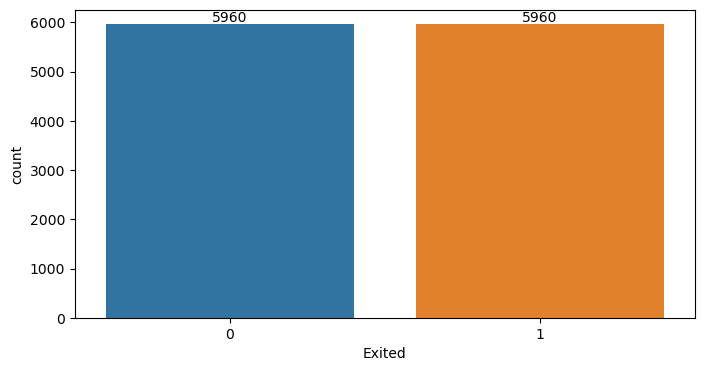

In [36]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=y_resampled_train, x=y_resampled_train["Exited"])
ax.bar_label(container=ax.containers[0])
plt.show()

In [37]:
# Train XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_resampled_train, y_resampled_train)
y_pred_test_xgb = xgb_model.predict(X_test)
y_pred_train_xgb = xgb_model.predict(X_resampled_train)

In [38]:
accuracy_xgb_testdata_resample = accuracy_score(y_test, y_pred_test_xgb) * 100
accuracy_xgb_traindata_resample = accuracy_score(y_resampled_train, y_pred_train_xgb) * 100
print(f"Accuracy of the XGBoost Model on Testdata: {accuracy_xgb_testdata_resample:.2f}")
print(f"Accuracy of the XGBoost Model on Traindata: {accuracy_xgb_traindata_resample:.2f}")
print(classification_report(y_test, y_pred_test_xgb))

Accuracy of the XGBoost Model on Testdata: 83.28
Accuracy of the XGBoost Model on Traindata: 96.93
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2003
           1       0.57      0.62      0.59       497

    accuracy                           0.83      2500
   macro avg       0.74      0.75      0.74      2500
weighted avg       0.84      0.83      0.83      2500



In [39]:
#Train SVM model
svm_model = SVC()
svm_model.fit(X_resampled_train, y_resampled_train)
y_pred_test_svm = svm_model.predict(X_test)
y_pred_train_svm = svm_model.predict(X_resampled_train)

In [40]:
accuracy_svm_testdata_resample = accuracy_score(y_test, y_pred_test_svm) * 100
accuracy_svm_traindata_resample = accuracy_score(y_resampled_train, y_pred_train_svm) * 100
print(f"Accuracy of the Support Vector Machine Model on test data: {accuracy_svm_testdata_resample:.2f}")
print(f"Accuracy of the Support Vector Machine Model on train data: {accuracy_svm_traindata_resample:.2f}")
print(classification_report(y_test, y_pred_test_svm))

Accuracy of the Support Vector Machine Model on test data: 77.60
Accuracy of the Support Vector Machine Model on train data: 82.09
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2003
           1       0.46      0.74      0.57       497

    accuracy                           0.78      2500
   macro avg       0.69      0.76      0.71      2500
weighted avg       0.83      0.78      0.79      2500



In [41]:
# Train ANN model with tesorflow
ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=10, activation='tanh')) # add first hidden layer
ann_model.add(tf.keras.layers.Dense(units=10, activation='tanh')) # add first hidden layer
ann_model.add(tf.keras.layers.Dense(units=10, activation='tanh')) # add second hidden layer
ann_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # add output layer
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["accuracy"]) # compile model
ann_model.fit(X_resampled_train, y_resampled_train, batch_size = 32, epochs = 100) # train model
y_pred_ann = ann_model.predict(X_test)

Epoch 1/100
373/373 [==============================] - 2s 3ms/step - loss: 0.6096 - accuracy: 0.6634
Epoch 2/100
373/373 [==============================] - 1s 3ms/step - loss: 0.5632 - accuracy: 0.7065
Epoch 3/100
373/373 [==============================] - 1s 3ms/step - loss: 0.5424 - accuracy: 0.7179
Epoch 4/100
373/373 [==============================] - 1s 3ms/step - loss: 0.5075 - accuracy: 0.7513
Epoch 5/100
373/373 [==============================] - 1s 3ms/step - loss: 0.4795 - accuracy: 0.7659
Epoch 6/100
373/373 [==============================] - 1s 3ms/step - loss: 0.4673 - accuracy: 0.7712
Epoch 7/100
373/373 [==============================] - 1s 3ms/step - loss: 0.4595 - accuracy: 0.7748
Epoch 8/100
373/373 [==============================] - 1s 3ms/step - loss: 0.4541 - accuracy: 0.7799
Epoch 9/100
373/373 [==============================] - 1s 3ms/step - loss: 0.4500 - accuracy: 0.7792
Epoch 10/100
373/373 [==============================] - 1s 3ms/step - loss: 0.4463 - accura

In [42]:
train_probs = ann_model.predict(X_resampled_train)
y_pred_train_ann = (train_probs > 0.5).astype(int)
accuracy_ann_traindata_resample = accuracy_score(y_resampled_train, y_pred_train_ann)
test_probs = ann_model.predict(X_test)
y_pred_test_ann = (test_probs > 0.5).astype(int)
accuracy_ann_testdata_resample = accuracy_score(y_test, y_pred_test_ann)
print(f'Train Accuracy ANN model: {accuracy_ann_traindata_resample * 100:.2f} %')
print(f'Test Accuracy ANN model: {accuracy_ann_testdata_resample * 100:.2f} %')
print(classification_report(y_test, y_pred_test))

79/79 [==============================] - 0s 2ms/step
Train Accuracy ANN model: 82.22 %
Test Accuracy ANN model: 79.80 %
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2003
           1       0.73      0.51      0.60       497

    accuracy                           0.86      2500
   macro avg       0.81      0.73      0.76      2500
weighted avg       0.86      0.86      0.86      2500



In [43]:
# Train model with Random Forest
rfc_model = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc_model.fit(X_resampled_train, y_resampled_train)
y_pred_rfc_testdata = rfc_model.predict(X_test)
y_pred_rfc_traindata = rfc_model.predict(X_resampled_train)

In [44]:
accuracy_rfc_testdata_resample = accuracy_score(y_test, y_pred_rfc_testdata) * 100
accuracy_rfc_traindata_resample = accuracy_score(y_resampled_train, y_pred_rfc_traindata) * 100
print(f"Accuracy of the Random Forest Classification Model on test data: {accuracy_rfc_testdata_resample:.2f}")
print(f"Accuracy of the Random Forest Classification Model on train data: {accuracy_rfc_traindata_resample:.2f}")
print(classification_report(y_test, y_pred_rfc_testdata))

Accuracy of the Random Forest Classification Model on test data: 85.56
Accuracy of the Random Forest Classification Model on train data: 100.00
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2003
           1       0.67      0.54      0.60       497

    accuracy                           0.86      2500
   macro avg       0.78      0.74      0.76      2500
weighted avg       0.85      0.86      0.85      2500



In [45]:
# Train model with KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_resampled_train, y_resampled_train)
y_pred_knn_testdata = knn_model.predict(X_test)
y_pred_knn_traindata = knn_model.predict(X_resampled_train)

In [46]:
accuracy_knn_testdata_resample = accuracy_score(y_test, y_pred_knn_testdata) * 100
accuracy_knn_traindata_resample = accuracy_score(y_resampled_train, y_pred_knn_traindata) * 100
print(f"Accuracy of the K-nearest neighbors Model on test data: {accuracy_knn_testdata_resample:.2f}")
print(f"Accuracy of the K-nearest neighbors Model on train data: {accuracy_knn_traindata_resample:.2f}")
print(classification_report(y_test, y_pred_knn_testdata))

Accuracy of the K-nearest neighbors Model on test data: 72.40
Accuracy of the K-nearest neighbors Model on train data: 89.26
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      2003
           1       0.38      0.65      0.48       497

    accuracy                           0.72      2500
   macro avg       0.64      0.70      0.65      2500
weighted avg       0.79      0.72      0.75      2500



We can see that by balancing the data, the percentage of ''recall'' increased, so we want to increase the amount of recall again by tuning the parameters, because recall is an important evaluation metrix for us in this model.

## Test the model and show the metrics

we choose the ANN model as final model so, we show the confusion matrix for that

In [47]:
conf_matrix_for_ann = confusion_matrix(y_test, y_pred_test_ann)

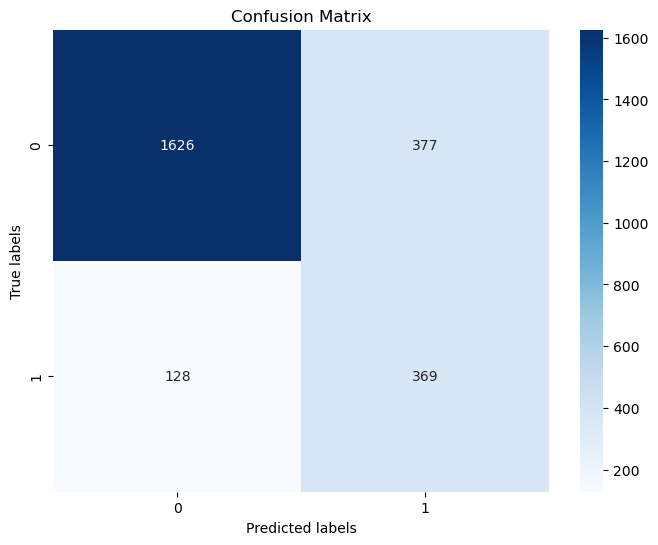

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_for_ann, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Save your final model

In [49]:
# Save final model
joblib.dump(ann_model, 'ann_model.joblib')

['ann_model.joblib']

## Send us the Result (Maktabkhoone)